#### Dataset Line

<div>

   <a href="https://www.kaggle.com/datasets/salader/dogs-vs-cats" style="
        display: inline-block;
        padding: 10px 20px;
        font-size: 16px;
        color: white;
        background-color: blue;
        text-decoration: none;
        border-radius: 5px;
        border: none;
        cursor: pointer;
    ">Click Me
    </a>
</div>

In [6]:
! pip install -q kaggle

In [7]:
from google.colab import files
files.upload()

Saving kaggle (3).json to kaggle (3) (1).json


{'kaggle (3) (1).json': b'{"username":"ruddro","key":"fb61acd5697e404629bb3e272131377a"}'}

In [12]:
!mkdir -p ~/.kaggle  # Ensure the directory exists
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json  # Set correct permissions

In [ ]:
!kaggle datasets list

In [14]:
!kaggle datasets download -d salader/dogs-vs-cats

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
 99% 1.06G/1.06G [00:08<00:00, 259MB/s]
100% 1.06G/1.06G [00:08<00:00, 132MB/s]


In [ ]:
!unzip dogs-vs-cats.zip -d dataset/

## Cat Dog Classification using CNN

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.metrics import classification_report, confusion_matrix

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout,Flatten,Conv2D,MaxPooling2D,MaxPool2D,BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping

#### generator
A generator in Python is a function that returns an iterator that produces a sequence of values when iterated over. Generators are written using the `yield` keyword. They are more memory efficient than lists because they generate items one at a time and only when required.

In [17]:
train_data = keras.utils.image_dataset_from_directory(
    directory=r"/content/dataset/train",
    labels="inferred",
    label_mode="int", # categorical, binary
    color_mode="rgb",
    batch_size=32,
    image_size=(256, 256),
)

test_data = keras.utils.image_dataset_from_directory(
    directory=r"/content/dataset/test",
    labels="inferred",
    label_mode="int", # categorical, binary
    color_mode="rgb",
    batch_size=32,
    image_size=(256, 256),
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [18]:
## Normalization
def process_normalization(image, label):
    return image / 255.0, label
    return image, label

In [19]:
train_ds = train_data.map(process_normalization)
test_ds = test_data.map(process_normalization)

In [20]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3,3),input_shape=(256, 256, 3),padding="valid", activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2),strides=(2,2),padding='valid'))
model.add(Conv2D(filters=64, kernel_size=(3,3),padding="valid", activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2),strides=(2,2),padding='valid'))
model.add(Conv2D(filters=128, kernel_size=(3,3),padding="valid", activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2),strides=(2,2),padding='valid'))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [21]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 254, 254, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 127, 127, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 125, 125, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 62, 62, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 60, 60, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 30, 30, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 115200)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │      14,745,728 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,847,297 (56.64 MB)

 Trainable params: 14,847,297 (56.64 MB)

 Non-trainable params: 0 (0.00 B)

In [23]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [24]:
history = model.fit(train_ds, validation_data=test_ds, epochs=10)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 52s 70ms/step - accuracy: 0.5928 - loss: 0.6971 - val_accuracy: 0.7376 - val_loss: 0.5316
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 49s 78ms/step - accuracy: 0.7656 - loss: 0.4846 - val_accuracy: 0.7800 - val_loss: 0.4611
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 77s 71ms/step - accuracy: 0.8209 - loss: 0.3837 - val_accuracy: 0.8026 - val_loss: 0.4536
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 51s 81ms/step - accuracy: 0.8884 - loss: 0.2587 - val_accuracy: 0.8000 - val_loss: 0.6585
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 78s 75ms/step - accuracy: 0.9492 - loss: 0.1309 - val_accuracy: 0.7940 - val_loss: 0.7660
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 81s 74ms/step - accuracy: 0.9740 - loss: 0.0769 - val_accuracy: 0.7926 - val_loss: 0.9508
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 82s 74ms/step - accuracy: 0.9832 - loss: 0.0497 - val_accuracy: 0.7906 - val_loss: 0.9126
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 46s 74ms/step - accuracy: 0.9863 - loss: 0.0412 - 

In [26]:
print("Train accuracy: ", history.history['accuracy'][-1]*100,"%")
print("Test accuracy: ", history.history['val_accuracy'][-1]*100,"%")

Train accuracy:  99.12999868392944 %
Test accuracy:  81.04000091552734 %


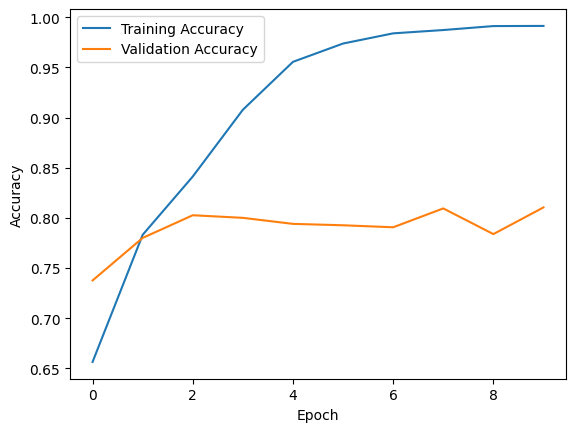

In [27]:
#create a plot of the training and validation accuracy over epochs
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

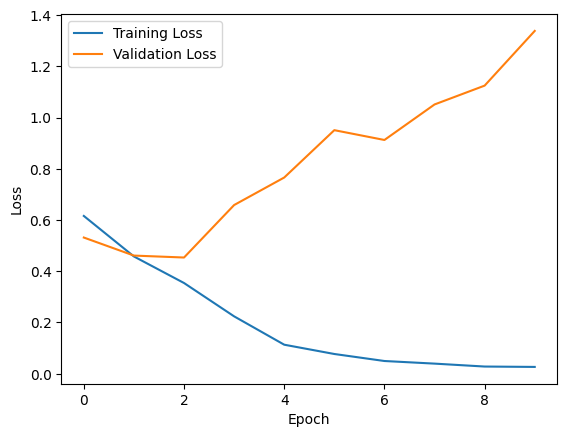

In [28]:
#create loss plot
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

157/157 ━━━━━━━━━━━━━━━━━━━━ 8s 48ms/step


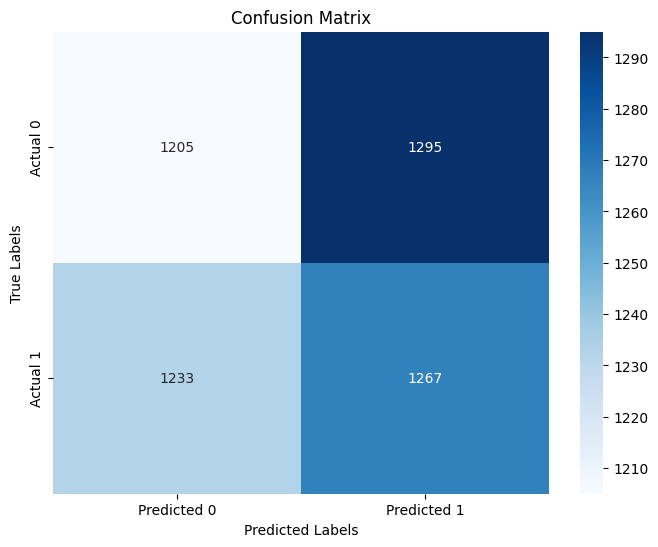

In [29]:
# prompt: create confusion matrix

import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'test_ds' is your test dataset and 'model' is your trained model
y_pred = model.predict(test_ds)
y_pred = (y_pred > 0.5) # Convert probabilities to binary predictions

# Extract true labels from test_ds
y_true = []
for images, labels in test_ds:
    y_true.extend(labels.numpy())
y_true = np.array(y_true)

cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


### Add Batch Normalization and Dropout Layer

In [30]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3,3),input_shape=(256, 256, 3),padding="valid", activation='relu',))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2),strides=(2,2),padding='valid'))
model.add(Conv2D(filters=64, kernel_size=(3,3),padding="valid", activation='relu',))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2),strides=(2,2),padding='valid'))
model.add(Conv2D(filters=128, kernel_size=(3,3),padding="valid", activation='relu',))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2),strides=(2,2),padding='valid'))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1, activation='sigmoid'))


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [31]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 254, 254, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 254, 254, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 127, 127, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 125, 125, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 125, 125, 64)        │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 62, 62, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 60, 60, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 60, 60, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 30, 30, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 115200)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 128)                 │      14,745,728 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,848,193 (56.64 MB)

 Trainable params: 14,847,745 (56.64 MB)

 Non-trainable params: 448 (1.75 KB)

In [32]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
history2 = model.fit(train_ds, validation_data=test_ds, epochs=20)

In [37]:
print("Train accuracy: ", history2.history['accuracy'][13]*100,"%")
print("Test accuracy: ", history2.history['val_accuracy'][13]*100,"%")

Train accuracy:  98.7500011920929 %
Test accuracy:  82.4999988079071 %


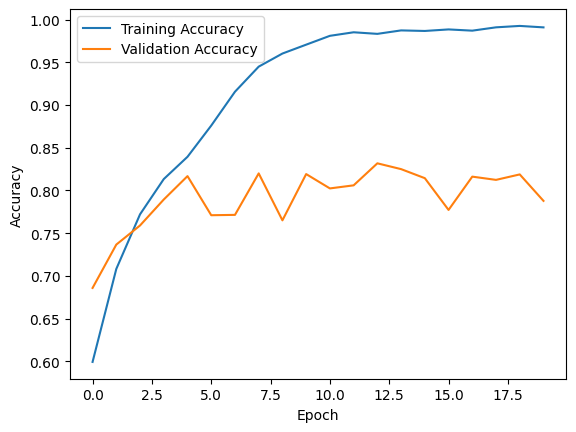

In [38]:
#create a plot of the training and validation accuracy over epochs
plt.plot(history2.history['accuracy'], label='Training Accuracy')
plt.plot(history2.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

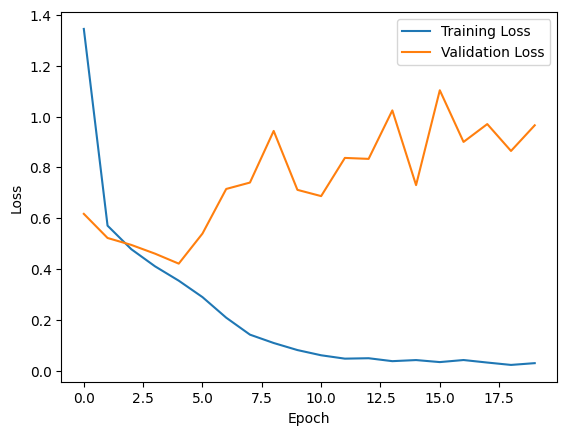

In [39]:
#create loss plot
plt.plot(history2.history['loss'], label='Training Loss')
plt.plot(history2.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

157/157 ━━━━━━━━━━━━━━━━━━━━ 9s 56ms/step


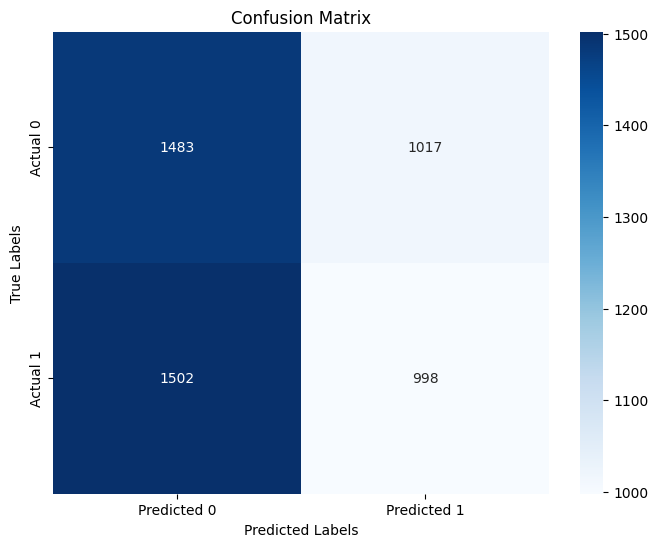

In [40]:
# prompt: create confusion matrix

import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'test_ds' is your test dataset and 'model' is your trained model
y_pred = model.predict(test_ds)
y_pred = (y_pred > 0.5) # Convert probabilities to binary predictions

# Extract true labels from test_ds
y_true = []
for images, labels in test_ds:
    y_true.extend(labels.numpy())
y_true = np.array(y_true)

cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()